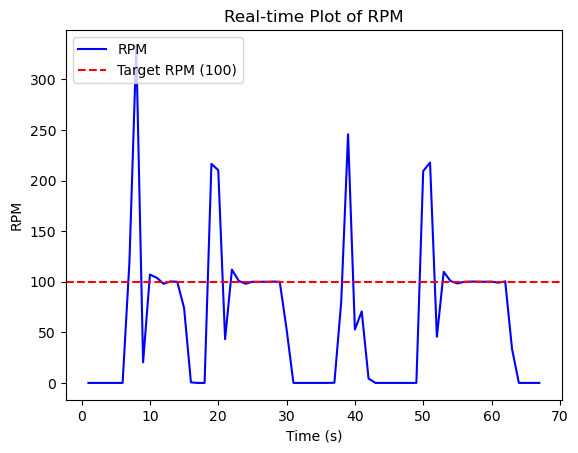

Process interrupted by user.
Serial connection closed.


In [7]:
import serial
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display

# Use interactive mode
%matplotlib inline

# Open the serial port (make sure the port is correct)
ser = serial.Serial('COM5', 115200)  # Replace 'COM5' with your port
time.sleep(2)  # Wait for ESP32 to reset

# Set up the plot
plt.figure(figsize=(10, 6))  # Set the figure size (width=10, height=6)
x_data, y_data = [], []  # Lists to store the x and y values

x = 0
rpm = 0
target_rpm = 100

try:
    while True:
        # Read data from the serial port
        line = ser.readline().decode('utf-8').strip()
        # print(line)
        # Parse the line to extract x and y values
        if line.startswith("PWM:"):
            # Extract x and y values
            parts = line.split()
            for part in parts:
                if "RPM" in part:
                    rpm = float(part.split(":")[1])
            x += 1
            # print(x, rpm)

            # Append the new data for plotting
            x_data.append(x)
            y_data.append(rpm)

            # Clear previous output (to update the graph in the same cell)
            clear_output(wait=True)

            # Plot the updated data
            plt.plot(x_data, y_data, label="RPM", color="blue")
            
            # Plot the horizontal line for target RPM
            plt.axhline(y=target_rpm, color='red', linestyle='--', label=f"Target RPM ({target_rpm})")
            
            # Set labels and title
            plt.xlabel("Time (s)")
            plt.ylabel("RPM")
            plt.title("Real-time Plot of RPM")

            # Redraw the plot
            plt.legend(loc="upper left")
            plt.show()

            # Pause to allow the plot to update
            time.sleep(0.1)

except KeyboardInterrupt:
    print("Process interrupted by user.")

finally:
    # Close the serial connection when done
    ser.close()
    print("Serial connection closed.")
